# CEE 498: Transportation Economics

## Assignment Three: Operator Objectives

Noah Garfinkle (garfink2@illinois.edu)

13 February 2020

# Imports and Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import root_scalar #this works only for scalar functions
from scipy.optimize import minimize
import sympy as sy

# Problem 1

Ridership, $Q$, on a bus line is given by

$$
Q=e^{\alpha-\beta P-\frac{\gamma}{f}}
$$

Where $\alpha=4$, $\beta=0.25$, and $\gamma=4$.
You have to cover fixed costs $F=5$.  The cost of frequency is $c_f=3$.

## Part a

Derive and calculate values for $P$, $Q$, and $f$ which maximize ridership.

In [6]:
def budgetConstraint_λ(λ,γ=4.0,β=0.25,α=4.0,cf=3.0,F=5.0):
    term1 = -1/np.power(λ,2)
    term2 = β/np.power(λ,3)
    term3 = -1*cf*np.sqrt((γ/(cf*λ))*(1-β/λ))
    bc = term1 + term2 + term3 - F
    return bc

C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


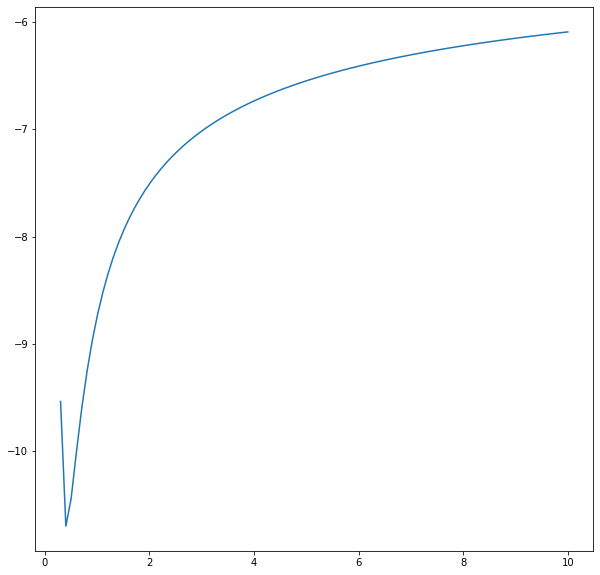

In [9]:
λs = np.linspace(0,10,100)
bcs = [budgetConstraint_λ(λ) for λ in λs]
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(λs,bcs)

## Part b

Derive and calculate values for $P$, $Q$, and $f$ which maximize frequency.

# Problem 2

Suppose that the federal government agrees to cover the fixed costs, so $F=0$.  Derive, in terms of $\alpha$, $\beta$, $\gamma$ , and $c$ the value of $f$ at which price is minimized, and the minimum price.
